In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [4]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 634.5+ KB


In [6]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
#we are making only two categories in output 
#ie. 'good quality ' or 'bad quality' in the form 1 and 0 resp.
#quality having 7 or more than is considered as 1 and remaing is considered as 0
data['Goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]
data['Goodquality'].value_counts()


0    5220
1    1277
Name: Goodquality, dtype: int64

In [8]:
data['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [9]:
#in datafram 'df' we are only considering 'red' type of wine
df=data[data['type']=='red']
df['type'].value_counts()

red    1599
Name: type, dtype: int64

In [10]:
# as we can see here data set is having few features which contain missing values or blank space
# so now we need find those missing values and deal with it
#either drop it or replace by some value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 4898 to 6496
Data columns (total 14 columns):
type                    1599 non-null object
fixed acidity           1597 non-null float64
volatile acidity        1598 non-null float64
citric acid             1598 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1597 non-null float64
sulphates               1597 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
Goodquality             1599 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 181.1+ KB


In [11]:
df.drop('type',axis=1,inplace=True)

C:\Users\amol\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
df.drop('quality',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 4898 to 6496
Data columns (total 12 columns):
fixed acidity           1597 non-null float64
volatile acidity        1598 non-null float64
citric acid             1598 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1597 non-null float64
sulphates               1597 non-null float64
alcohol                 1599 non-null float64
Goodquality             1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [13]:
df.dropna()
df.isnull().sum()

fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
Goodquality             0
dtype: int64

In [14]:
print(df['fixed acidity'].mean())

8.322103944896709


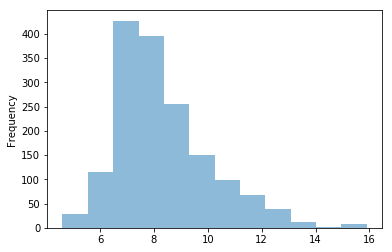

In [15]:
df['fixed acidity'].plot.hist(bins=12, alpha=0.5)

In [16]:
df['fixed acidity'].replace(to_replace=np.nan,value=7,inplace=True)

C:\Users\amol\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
Goodquality             0
dtype: int64

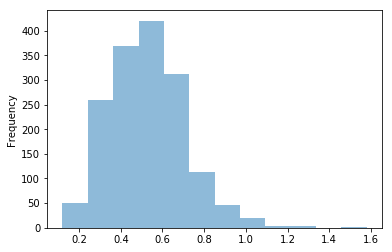

In [18]:
df['volatile acidity'].plot.hist(bins=12, alpha=0.5)

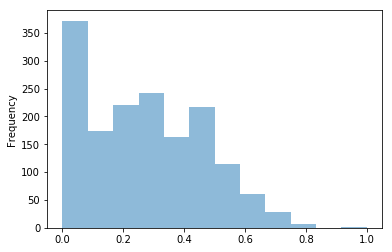

In [19]:
df['citric acid'].plot.hist(bins=12, alpha=0.5)

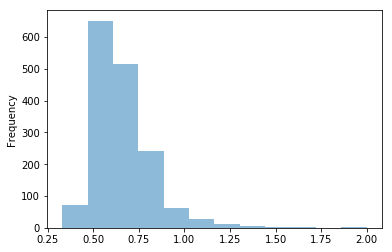

In [20]:
df['sulphates'].plot.hist(bins=12, alpha=0.5)

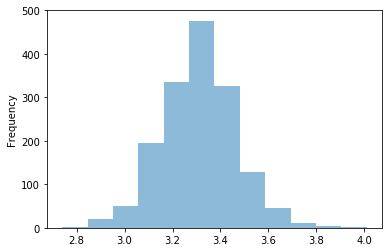

In [21]:
df['pH'].plot.hist(bins=12, alpha=0.5)

In [22]:
df['volatile acidity'].replace(to_replace=np.nan,value=0.5,inplace=True)
df['citric acid'].replace(to_replace=np.nan,value=0.1,inplace=True)
df['sulphates'].replace(to_replace=np.nan,value=0.6,inplace=True)
df['pH'].replace(to_replace=np.nan,value=3.3,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 4898 to 6496
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
Goodquality             1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


Upto this we have handled the missing data

In [24]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Goodquality
fixed acidity,1.000000,-0.255679,0.671592,0.114854,0.093629,-0.154048,-0.113539,0.668100,-0.682143,0.184234,-0.061646,0.119930
volatile acidity,-0.255679,1.000000,-0.552935,0.001934,0.061539,-0.011475,0.075538,0.022802,0.234452,-0.261519,-0.203568,-0.270534
citric acid,0.671592,-0.552935,1.000000,0.143530,0.203839,-0.060290,0.035629,0.364885,-0.541094,0.314001,0.110238,0.214667
residual sugar,0.114854,0.001934,0.143530,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085868,0.005420,0.042075,0.047779
chlorides,0.093629,0.061539,0.203839,0.055610,1.000000,0.005562,0.047400,0.200632,-0.264937,0.371400,-0.221141,-0.097308
free sulfur dioxide,-0.154048,-0.011475,-0.060290,0.187049,0.005562,1.000000,0.667666,-0.021946,0.071120,0.050400,-0.069408,-0.071747
total sulfur dioxide,-0.113539,0.075538,0.035629,0.203028,0.047400,0.667666,1.000000,0.071269,-0.065473,0.042989,-0.205654,-0.139517
density,0.668100,0.022802,0.364885,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341250,0.149014,-0.496180,-0.150460
pH,-0.682143,0.234452,-0.541094,-0.085868,-0.264937,0.071120,-0.065473,-0.341250,1.000000,-0.198125,0.205744,-0.056680
sulphates,0.184234,-0.261519,0.314001,0.005420,0.371400,0.050400,0.042989,0.149014,-0.198125,1.000000,0.093028,0.199830


In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4898,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
4899,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
4900,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
4901,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4902,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [26]:
from sklearn.preprocessing  import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)
x=x.rename(columns={0:'fixed acidity',1:'volatile acidity',2:'citric acid',3:'residual sugar',4:'chlorides',5:'free sulfur dioxide',6:'total sulfur dioxide',7:'density',8:'pH',9:'sulphates',10:'alcohol'})
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [27]:
from sklearn.feature_selection import chi2,SelectKBest

In [28]:
pre_model=SelectKBest(chi2,k=8)
kbest=pre_model.fit_transform(x,y)

In [37]:
pre_model.get_support()

array([ True,  True,  True, False, False,  True,  True,  True, False,
        True,  True])

In [42]:
x_kbest=pd.DataFrame(kbest)
x_kbest.head()

,0,1,2,3,4,5,6,7
0,0.247788,0.397260,0.00,0.140845,0.098940,0.567548,0.137725,0.153846
1,0.283186,0.520548,0.00,0.338028,0.215548,0.494126,0.209581,0.215385
2,0.283186,0.438356,0.04,0.197183,0.169611,0.508811,0.191617,0.215385
3,0.584071,0.109589,0.56,0.225352,0.190813,0.582232,0.149701,0.215385
4,0.247788,0.397260,0.00,0.140845,0.098940,0.567548,0.137725,0.153846


In [44]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x_kbest,y,test_size=0.2,random_state=1)

In [45]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()

In [46]:
model1.fit(xtrain,ytrain)
ypred=model1.predict(xtest)
ypred

C:\Users\amol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [47]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

In [48]:
print(accuracy_score(ytest,ypred))

0.909375


In [49]:
precision_score(ytest,ypred)

0.56

In [50]:
confusion_matrix(ytest,ypred)

array([[277,  11],
       [ 18,  14]], dtype=int64)

In [51]:
recall_score(ytest,ypred)

0.4375